Quadratic assignmet problem is one of the most diffucult problem in the field of discreate optimization. It has not to be large scale to be challanging. Even small-scale problems take a long time to achieve optimum solution. There are various formulations in the literature. I employed Adams and Johnson Formulation which has tigthest lower bound. For detail about QAP: https://core.ac.uk/download/pdf/52940254.pdf

In [22]:
import gurobipy as gb
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy as sp

In [23]:
n = 10#number of cities and departments
koordinat = np.random.randint(2,150,(n,2))
distance = scipy.spatial.distance.cdist(koordinat,koordinat) 
m2 = np.random.randint(1,40, (n,n))#for flow

In [24]:
A = pd.DataFrame(m2)
A[A<np.mean(m2)*1.1] = 0#I set all flows whose values are less than mean*1.1 to 0 in order to create a sparse matrix. You can use different tehchnics
A = np.array(A)
flow = (A+A.T)
np.fill_diagonal(flow,0)
spr = 1-np.count_nonzero(flow)/flow.size
print("%",spr*100)#sparse rate

% 38.0


In [25]:
flow

array([[ 0, 26, 38, 65, 59,  0,  0, 26, 65,  0],
       [26,  0,  0,  0, 64, 32, 67, 35, 34, 38],
       [38,  0,  0, 63, 39,  0, 29, 31,  0,  0],
       [65,  0, 63,  0, 31, 63, 37, 25,  0, 33],
       [59, 64, 39, 31,  0, 31, 36, 56, 62,  0],
       [ 0, 32,  0, 63, 31,  0,  0, 37,  0, 53],
       [ 0, 67, 29, 37, 36,  0,  0,  0,  0, 31],
       [26, 35, 31, 25, 56, 37,  0,  0, 63, 26],
       [65, 34,  0,  0, 62,  0,  0, 63,  0, 37],
       [ 0, 38,  0, 33,  0, 53, 31, 26, 37,  0]])

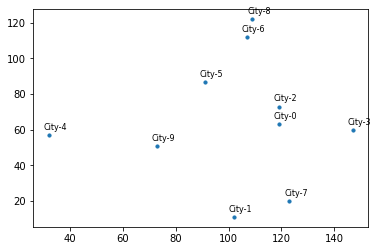

In [26]:
Deparments = ["Dep-"+str(i) for i in range(n)]#Initial visuliation
Cities = ["City-"+str(i) for i in range(n)]
plt.scatter (koordinat[:,0:1],koordinat[:,1:2],s=10)
for i in range(n):
    plt.text(koordinat[:,0:1][i]-2,koordinat[:,1:2][i]+3, Cities[i], fontsize = 8)#https://www.statology.org/matplotlib-annotate-scatterplot/
plt.show()

In [27]:
mdl = gb.Model("QAP")

In [28]:
C = [(i,j,k,l) for i in range(n) for j in range(n) for k in range(n) for l in range(n)]

In [29]:
x = mdl.addVars(n,n, vtype = gb.GRB.BINARY, name = "Xij")#if department i is assigned to city j, it equals to 1, ow 0
y = mdl.addVars(C, vtype = gb.GRB.BINARY, name = "Yijkl")#if department i is assigned to city j and department k is assigned to city l, it equals to 1, ow 0

In [30]:
mdl.setObjective(gb.quicksum(y[i,j,k,l]*distance[j,l]*flow[i,k] for i,j,k,l in C)*0.5)#symetric comminication cost

In [31]:
mdl.addConstrs(gb.quicksum(x[i,j] for j in range(n)) == 1 for i in range(n))#each city can host exactly one department

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [32]:
mdl.addConstrs(gb.quicksum(x[i,j] for i in range(n)) == 1 for j in range(n))#each department can be assigned to exactly one city

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [33]:
mdl.addConstrs(gb.quicksum(y[i,j,k,l] for k in range(n)) == x[i,j] for i in range(n) 
                 for j in range(n) for l in range(n))

{(0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 8): <gurobi.Constr *Awaiting Model Upd

In [34]:
mdl.addConstrs(gb.quicksum(y[i,j,k,l] for l in range(n)) == x[i,j] for i in range(n) 
                 for j in range(n) for k in range(n))

{(0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 8): <gurobi.Constr *Awaiting Model Upd

In [35]:
mdl.addConstrs(gb.quicksum(y[i,j,k,l] for i in range(n)) == x[k,l] for j in range(n) 
                 for k in range(n) for l in range(n))

{(0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 8): <gurobi.Constr *Awaiting Model Upd

In [37]:
mdl.addConstrs(gb.quicksum(y[i,j,k,l] for j in range(n)) == x[k,l] for i in range(n) 
                 for k in range(n) for l in range(n) )

{(0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 8): <gurobi.Constr *Awaiting Model Upd

In [39]:
mdl.addConstrs(y[i,j,k,l] == y[k,l,i,j] for i in range(n) for j in range(n) for k in range(n) for l in range(n)
                                                    if k > i and j != l)

{(0, 0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 9): <gurobi.Constr *Awaiting Model Up

In [40]:
liste = list(range(n))+list(range(n))
liste1 = [(liste[i],liste[i+n]) for i in range(n)]
for i in liste1:#warm start (a feasible initial solution). Models speed up through initial solution.
    x[i].setAttr("start",1)

In [41]:
#mdl.params.MIPGap = 0.1
mdl.params.GomoryPasses = 15
mdl.params.Method = 2
#mdl.params.Cuts = 0
mdl.params.ImproveStartTime = 200
mdl.params.PreSolve = 1
mdl.optimize()

Changed value of parameter GomoryPasses to 15
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter Method to 2
   Prev: -1  Min: -1  Max: 5  Default: -1
Changed value of parameter ImproveStartTime to 200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter PreSolve to 1
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 8070 rows, 10100 columns and 52300 nonzeros
Model fingerprint: 0x4414c072
Variable types: 0 continuous, 10100 integer (10100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

User MIP start produced solution with objective 91760 (0.02s)
Loaded user MIP start with objective 91760

Presolve removed 6250 rows and 5950 columns
Presolve time: 0.61s
Presolved: 1820 rows,

In [42]:
mdlll.printAttr("X")


    Variable            X 
-------------------------
  X11ij[0,8]            1 
  X11ij[1,6]            1 
  X11ij[2,3]            1 
  X11ij[3,0]            1 
  X11ij[4,7]            1 
  X11ij[5,4]            1 
  X11ij[6,5]            1 
  X11ij[7,9]            1 
  X11ij[8,1]            1 
  X11ij[9,2]            1 
Yijkl[0,8,0,8]            1 
Yijkl[0,8,1,6]            1 
Yijkl[0,8,2,3]            1 
Yijkl[0,8,3,0]            1 
Yijkl[0,8,4,7]            1 
Yijkl[0,8,5,4]            1 
Yijkl[0,8,6,5]            1 
Yijkl[0,8,7,9]            1 
Yijkl[0,8,8,1]            1 
Yijkl[0,8,9,2]            1 
Yijkl[1,6,0,8]            1 
Yijkl[1,6,1,6]            1 
Yijkl[1,6,2,3]            1 
Yijkl[1,6,3,0]            1 
Yijkl[1,6,4,7]            1 
Yijkl[1,6,5,4]            1 
Yijkl[1,6,6,5]            1 
Yijkl[1,6,7,9]            1 
Yijkl[1,6,8,1]            1 
Yijkl[1,6,9,2]            1 
Yijkl[2,3,0,8]            1 
Yijkl[2,3,1,6]            1 
Yijkl[2,3,2,3]            1 
Yijkl[2,3

In [43]:
assignment = [(i,j) for i in range(n) for j in range(n)  if x11[i,j].x == 1]
assignment1 = [(j,i) for i in range(n) for j in range(n)  if x11[i,j].x == 1]
assignment1.sort()

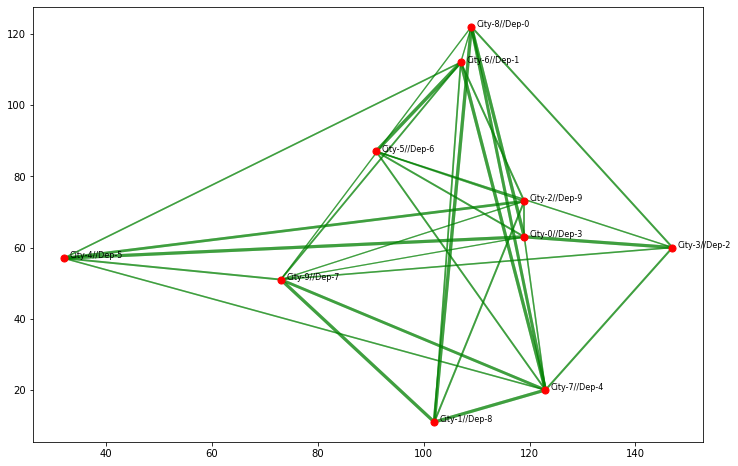

In [44]:
liste = [str(Cities[i])+"//"+str(Deparments[j]) for i,j in assignment1]
plt.figure(figsize=(12,8))
xc = np.array(koordinat[:,0:1])
yc = np.array(koordinat[:,1:2])
for i,j in x11:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0,linewidth=flow[assignment1[i][1],assignment1[j][1]]/20,alpha=0.5)#alpha tansparancy
for i in range(n):
    plt.text(koordinat[:,0:1][i]+1,koordinat[:,1:2][i], liste[i], fontsize = 8)
#for k in tesis:
    #plt.plot(xc[k], yc[k], c='r', marker='o', markersize = B[k]/25)#tesisisin maliyetine göre markersize ı ayarladım.
plt.scatter(xc[0:], yc[0:], c='r',s = 50)#s marker size